# Clusterin jerárquico y dendogramas.
### Antes de comenzar, pongamos un poco de notación para hablar todos el mismo idioma.
* X -> dataset(array de n x n) de puntos a clusterizar.
* n -> número de datos.
* m -> número de rasgos.
* Z -> array de enlace del cluster con la informacion de las uniones.
* k -> número de clusters

In [1]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

* Plantamos una semilla aleatoria.

(150, 2)


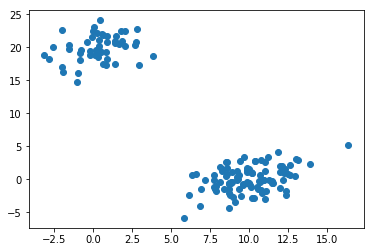

In [11]:
np.random.seed(4711)
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size = [100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size = [50,])
X = np.concatenate((a, b))
print(X.shape)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

* Z es la matriz de enlace.

In [12]:
Z = linkage(X, "ward")
Z

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

In [13]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [14]:
c, coph_dist = cophenet(Z, pdist(X))
c

0.9800148387574268

In [16]:
Z[0], Z[1]

(array([5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00]),
 array([1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00]))

In [18]:
print(Z[152 - len(X)])   ## Cluster 152
print(Z[158 - len(X)])   ## Cluster 158

[33.         68.          0.07106779  2.        ]
[15.         69.          0.11428971  2.        ]


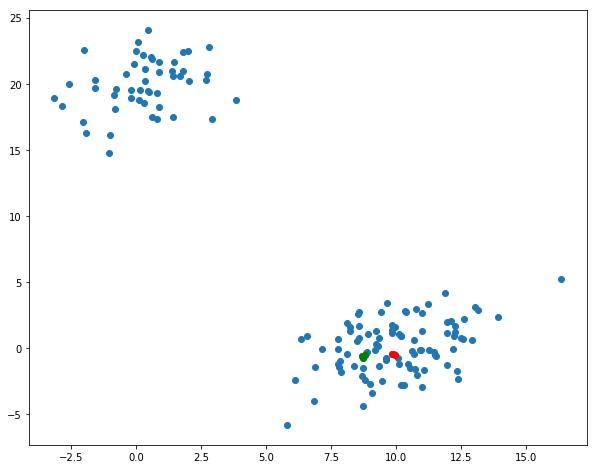

In [20]:
idx = [33, 62, 68]
idx2 = [15, 69, 41]
plt.figure(figsize = (10, 8))
plt.scatter(X[:, 0], X[:, 1])   ## Dibujar todos los puntos.
plt.scatter(X[idx, 0], X[idx, 1], c = "r")   ## Destacamos en rojo los puntos interesantes.
plt.scatter(X[idx2, 0], X[idx2, 1], c = "g")   ## Destacamos en verde los puntos interesantes.
plt.show()

### Representación gráfica de un dendrograma...

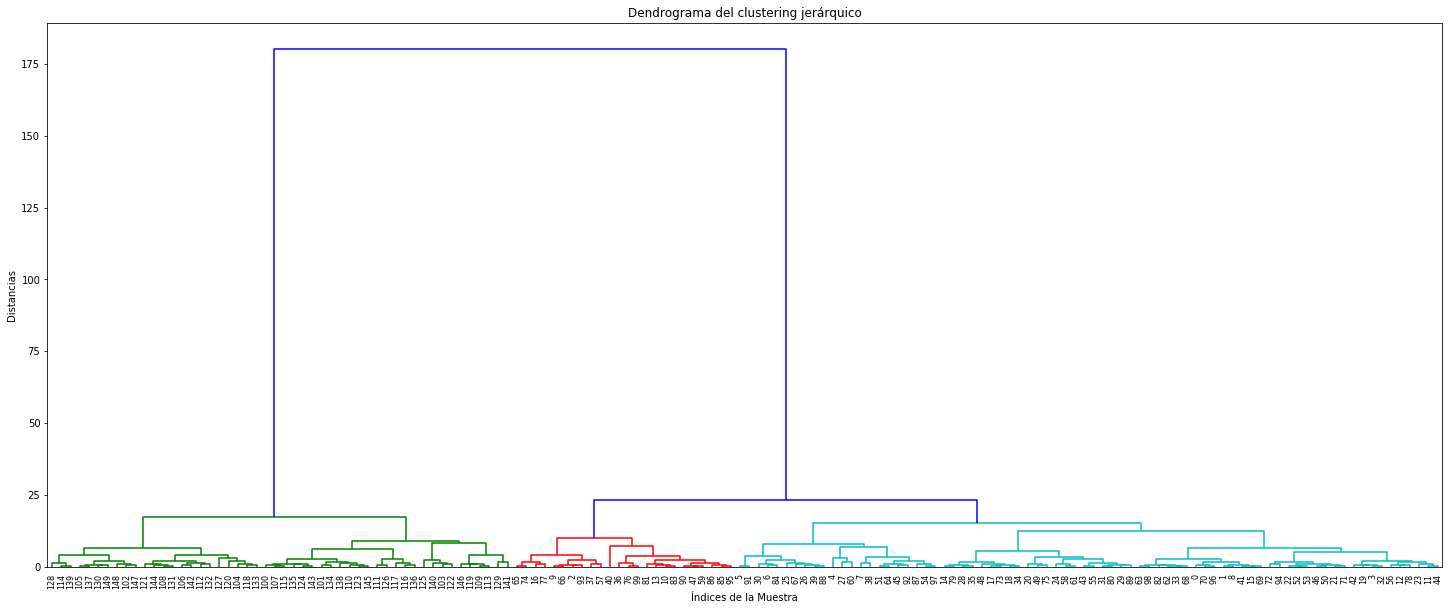

In [28]:
plt.figure(figsize = (25, 10))
plt.title("Dendrograma del clustering jerárquico")
plt.xlabel("Índices de la Muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation = 90.0, leaf_font_size = 8.0, color_threshold = 0.1 * 180)
plt.show()

In [25]:
Z[-4:, 2]   # Últimos 4 de la segunda columna desde el final (distancias).

array([ 15.11533118,  17.11527362,  23.12198936, 180.27043021])

### Truncar el dendrograma...

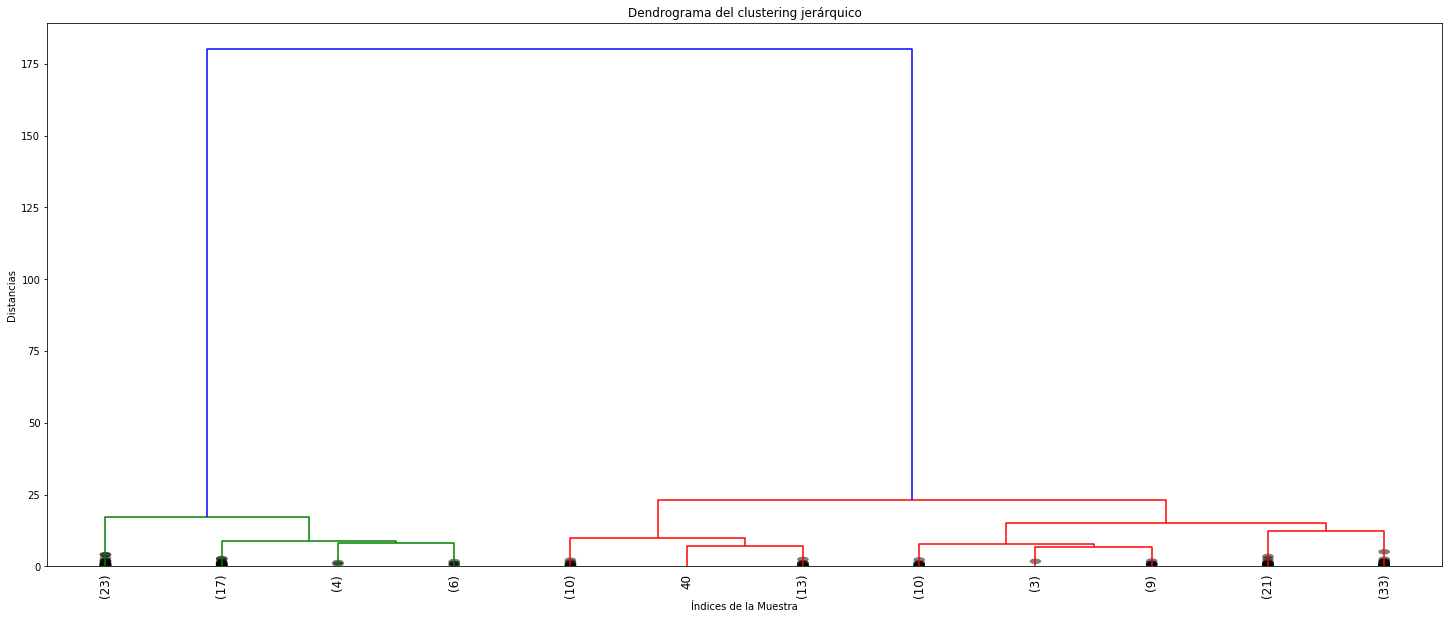

In [37]:
plt.figure(figsize = (25, 10))
plt.title("Dendrograma del clustering jerárquico")
plt.xlabel("Índices de la Muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation = 90.0, 
           leaf_font_size = 12.0,         ## Tamaño de la fuente "12 puntos".
           color_threshold = 0.7 * 180,   ## El valor por defecto es 70% de la altura máxima. Develve colores en el % que desees.
           truncate_mode = "lastp", 
           p = 12,                        ## Cantidad de puntos finales que quieres tener. 12 en este caso.
           show_leaf_counts = True,       ## Muestra entre parentesis en el eje x la cantidad de puntos dentro de cada hoja.
           show_contracted = True)        ## Contrae o no la figura para una mejor visualización.
plt.show()

### Dendrograma tuneado...

In [53]:
def dendrogram_tune(*args, **kwargs):
    max_d = kwargs.pop("max_d", None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    
    ddata = dendrogram(*args, **kwargs)
    #print(ddata)
    if not kwargs.get('no_plot', False):
        plt.title("Clustering jerárquico con dendrograma truncado")
        plt.xlabel("Índice del Dataset (o tamaño del cluster)")
        plt.ylabel("Distancia")
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1: 3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c = 'c')
                plt.annotate('%.3g' %y, (x, y), xytext = (0, -5), 
                             textcoords = "offset points", va = "top", ha = "center")
    if max_d:
        plt.axhline(y = max_d, c = 'k')
    return ddata

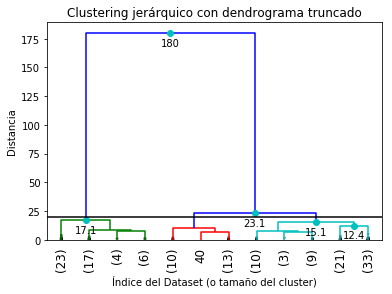

In [55]:
dendrogram_tune(Z, 
                truncate_mode = 'lastp', 
                p = 12, 
                leaf_rotation = 90.0, 
                leaf_font_size = 12.0, 
                show_contracted = True, 
                annotate_above = 10, 
                max_d = 20)
plt.show()

### Corte automático del dendrograma...
incosistency_i = (h_i - avg(h_j) / std(h_j))

In [57]:
from scipy.cluster.hierarchy import inconsistent

In [58]:
depth = 5
incons = inconsistent(Z, depth)
incons[-10:]

array([[ 1.80874989,  2.17061644, 10.        ,  2.44276733],
       [ 2.31731998,  2.19649179, 16.        ,  2.52742372],
       [ 2.24511599,  2.44225327,  9.        ,  2.37659088],
       [ 2.30462321,  2.44191287, 21.        ,  2.6387508 ],
       [ 2.20673283,  2.68378067, 17.        ,  2.84581581],
       [ 1.95309037,  2.58100378, 29.        ,  4.05821033],
       [ 3.46173275,  3.53735716, 28.        ,  3.29443647],
       [ 3.15857131,  3.54836284, 28.        ,  3.93327935],
       [ 4.90210137,  5.10301603, 28.        ,  3.57041559],
       [12.12200256, 32.15467931, 30.        ,  5.22936105]])